Relu
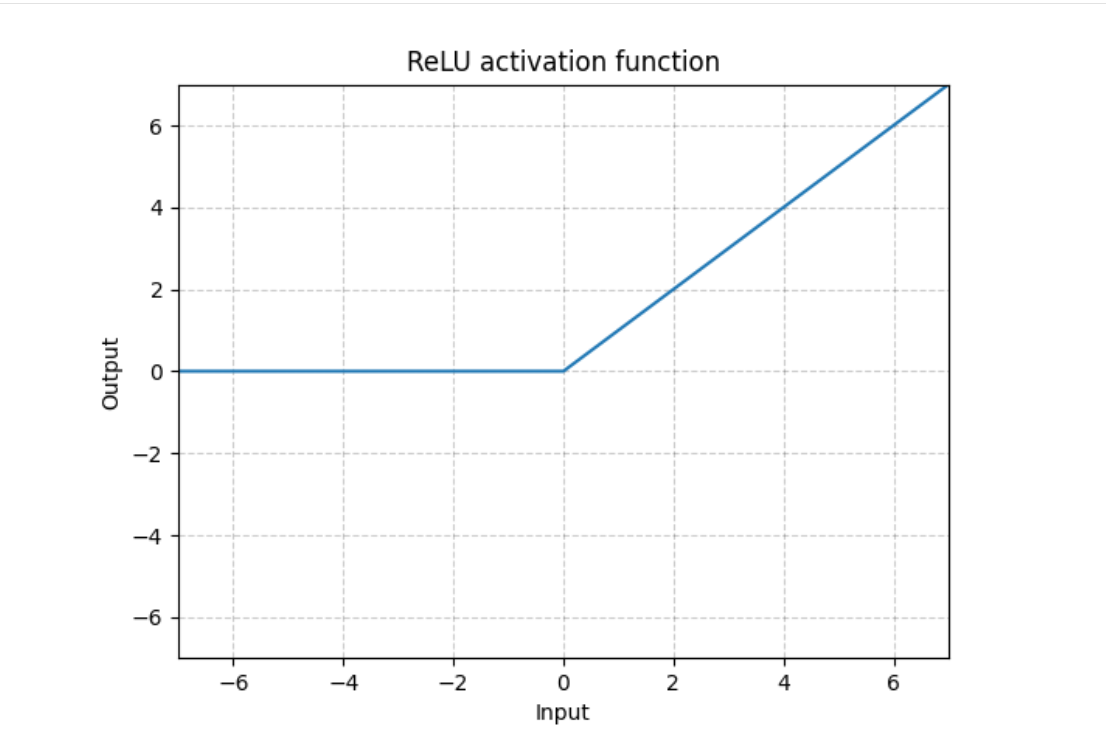

In [1]:
import torch

In [2]:
input = torch.tensor([
    [1,-0.5],
    [-1,3]
])

In [3]:
input.shape

torch.Size([2, 2])

In [6]:
input = torch.reshape(input,(-1,1,2,2))
input.shape

torch.Size([1, 1, 2, 2])

In [8]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.relu1 = torch.nn.ReLU()  # inplace 参数是否直接对原变量替换 默认为False
        
    def forward(self,input):
        output = self.relu1(input)
        return output

In [9]:
model = Model()

In [11]:
output = model(input)
print("input:\n:",input)
print("output:\n:",output)

input:
: tensor([[[[ 1.0000, -0.5000],
          [-1.0000,  3.0000]]]])
output:
: tensor([[[[1., 0.],
          [0., 3.]]]])


**CIFAR10数据集上测试其他非线性**

In [12]:
from torchvision import datasets,transforms

In [13]:
dataset =datasets.CIFAR10(
    root = "../../../datas",
    train = False,
    transform =transforms.ToTensor(),
    download = True
)

Files already downloaded and verified


In [14]:
from torch.utils.data import DataLoader

In [15]:
dataloader = DataLoader(dataset,batch_size=64)

In [20]:
class Model2(torch.nn.Module):
    def __init__(self):
        super(Model2,self).__init__()
        self.sigmoid1 = torch.nn.Sigmoid()
        
    def forward(self,input):
        output = self.sigmoid1(input)
        return output

In [21]:
model2 = Model2()

In [22]:
from torch.utils.tensorboard import SummaryWriter

In [23]:
writer = SummaryWriter("./Sigmoid_logs")
step=1
for data in dataloader:
    imgs,targets = data
    writer.add_images("input",imgs,step)
    output = model2(imgs)
    writer.add_images("out_put",output,step)
    step+=1
writer.close()

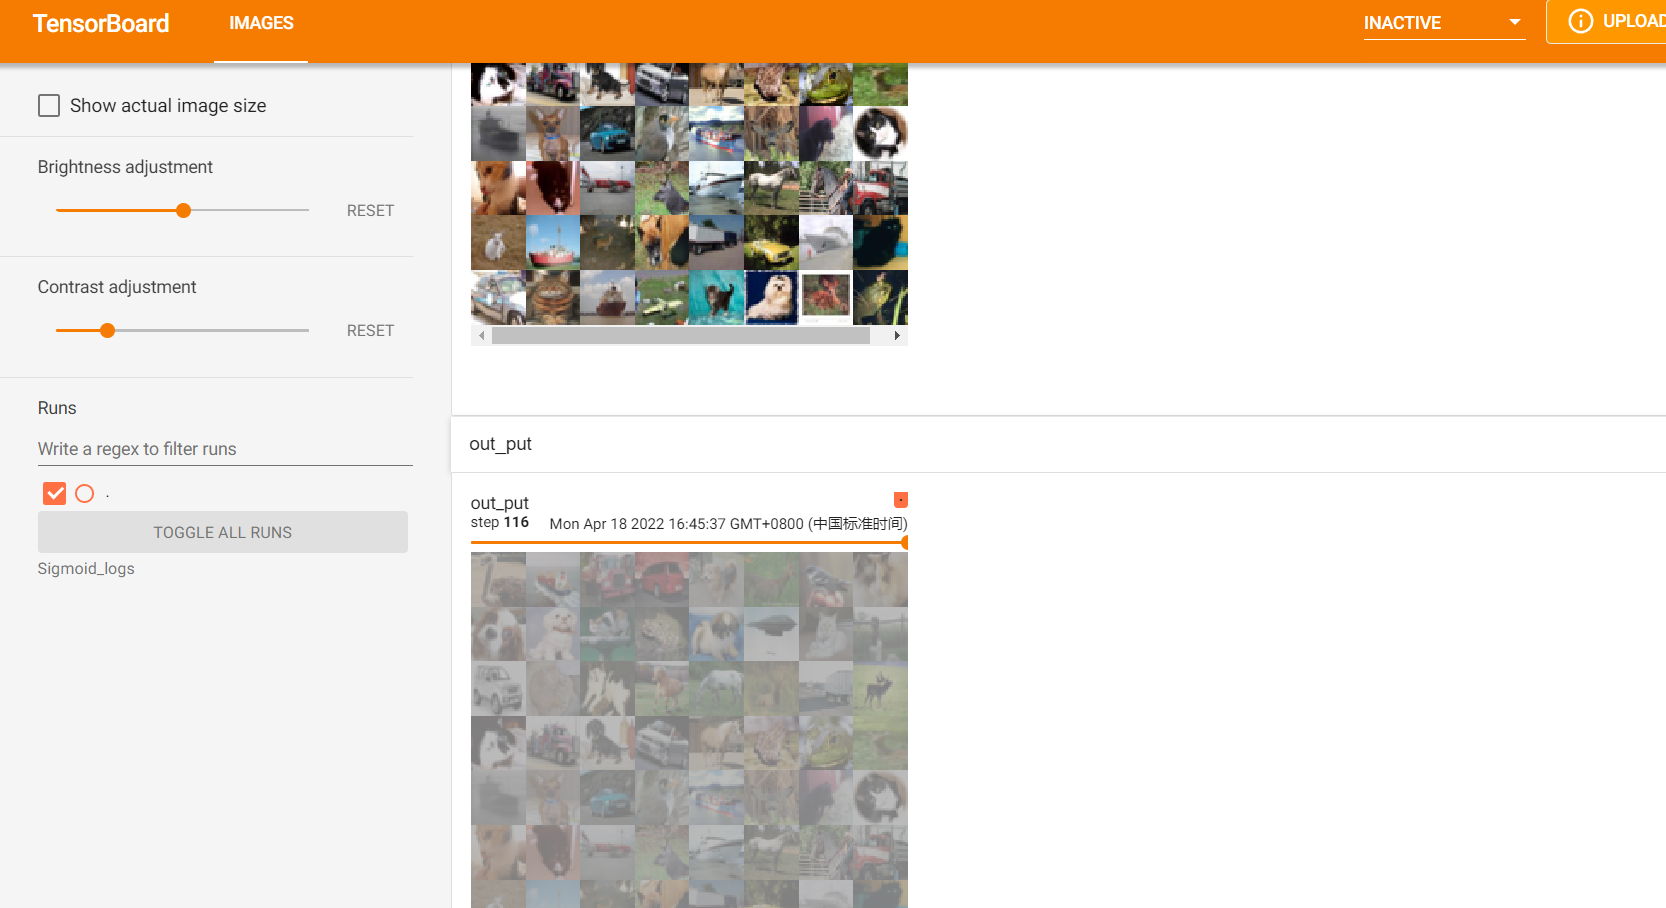